In [1]:
import torch
torch.cuda.empty_cache() 

In [2]:
import torchvision
print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())

PyTorch version: 2.0.1+cu117
Torchvision version: 0.15.2+cu117
CUDA is available: True


In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "max_split_size_mb:100000"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
os.getcwd()

'/home/yelhe/script/mt'

In [4]:
import glob
import shapely
from shapely.geometry import Polygon
import shapely.plotting

In [5]:
import pandas as pd
from PIL import Image as ima
import warnings

In [6]:
from mt_function_yl import *

In [7]:
df = pd.read_csv('/home/yelhe/script/mt/input/df_all_new1.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               3934 non-null   int64  
 1   gmedian            3934 non-null   float64
 2   rmedian            3934 non-null   float64
 3   bmedian            3934 non-null   float64
 4   gmean              3934 non-null   float64
 5   rmean              3934 non-null   float64
 6   bmean              3934 non-null   float64
 7   gstd               3934 non-null   float64
 8   rstd               3934 non-null   float64
 9   bstd               3934 non-null   float64
 10  gq25               3934 non-null   float64
 11  gq75               3934 non-null   float64
 12  rq25               3934 non-null   float64
 13  rq75               3934 non-null   float64
 14  bq25               3934 non-null   float64
 15  bq75               3934 non-null   float64
 16  cdmean             3934 

In [8]:
df = df.replace({True:1, False:0})

### Library Preparation 

In [9]:
# Importing Modules

from sklearn import * 
from sklearn import datasets
from sklearn.datasets import load_digits

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import HDBSCAN
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn

In [10]:
df.describe()

,mask,gmedian,rmedian,bmedian,gmean,rmean,bmean,gstd,rstd,bstd,...,ed,ratio_ell,perimeter,is_cen_inside,is_mce_inside,leftm,rightm,topm,bottomm,Nr
count,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,...,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3934.000000,3.934000e+03
mean,28.102440,107.681749,100.183401,106.295755,109.127158,102.028022,107.701587,32.921114,32.992329,33.063943,...,65.691370,5.549314,317.355061,0.976868,0.951195,274.200813,367.029995,289.734875,360.615150,9.990006e+14
std,18.414498,54.526821,57.441065,56.676323,50.180583,53.022707,52.341292,15.522335,16.047631,15.211095,...,89.665225,14.094178,442.020875,0.194571,0.306149,198.977944,199.225320,120.406286,110.592668,5.980060e+07
min,1.000000,1.000000,2.000000,2.000000,2.936775,5.470320,5.073171,0.966019,1.076037,0.984394,...,3.385138,1.009687,14.828427,-1.000000,-1.000000,0.000000,9.000000,0.000000,12.000000,9.990005e+14
25%,14.000000,68.000000,52.000000,62.000000,72.320588,58.401686,66.481011,21.114186,20.398521,21.631473,...,20.501906,1.582724,84.066756,1.000000,1.000000,84.000000,199.000000,249.000000,312.000000,9.990005e+14
50%,26.000000,101.000000,96.000000,99.000000,104.444885,99.833912,100.606188,31.884037,31.754133,31.781912,...,32.576752,2.343272,147.689862,1.000000,1.000000,272.000000,368.000000,307.000000,340.000000,9.990006e+14
75%,39.000000,144.000000,137.000000,144.000000,142.042793,134.371990,141.815392,42.606793,43.386159,42.230066,...,62.254161,4.426106,329.877939,1.000000,1.000000,449.000000,556.000000,347.000000,400.000000,9.990006e+14
max,106.000000,255.000000,255.000000,255.000000,254.839997,254.784007,254.851574,98.309030,98.262223,98.221301,...,521.869570,487.911969,4028.115996,1.000000,1.000000,630.000000,639.000000,625.000000,639.000000,9.990006e+14


In [14]:
df.loc[(df.label_group == 'means_of_transportation'), 'label_group'] = 'other'

In [15]:
# df_ = df_new.drop(['area', 'ed', 'perimeter'], axis=1)
le = LabelEncoder()
df['labelgroup_index'] = le.fit_transform(df['label_group'])
y = df['label_group']
y = le.transform(y)

In [18]:
# df.head()

In [17]:
df1= df
df1.groupby(['label_group','labelgroup_index']).size().reset_index().rename(columns={0:'count'})

,label_group,labelgroup_index,count
0,building,0,401
1,curb,1,49
2,infrastructure,2,717
3,other,3,2011
4,sky,4,112
5,vegetation,5,644


In [19]:
# 0 building; 1 curb; 2 infrastructure;
# 3 other; 4 sky; 5 vegetation

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mask               3934 non-null   int64  
 1   gmedian            3934 non-null   float64
 2   rmedian            3934 non-null   float64
 3   bmedian            3934 non-null   float64
 4   gmean              3934 non-null   float64
 5   rmean              3934 non-null   float64
 6   bmean              3934 non-null   float64
 7   gstd               3934 non-null   float64
 8   rstd               3934 non-null   float64
 9   bstd               3934 non-null   float64
 10  gq25               3934 non-null   float64
 11  gq75               3934 non-null   float64
 12  rq25               3934 non-null   float64
 13  rq75               3934 non-null   float64
 14  bq25               3934 non-null   float64
 15  bq75               3934 non-null   float64
 16  cdmean             3934 

In [24]:
dfc = df
# Drop info columns
dfc = dfc.drop(['label', 'Nr', 'label_group', 'mask', 'labelgroup_index'], axis = 1)
# Drop variables which don't help much
dfc = dfc.drop(['isconvex','is_cen_inside','is_mce_inside', 'leftm', 'rightm'], axis = 1)

In [25]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934 entries, 0 to 3933
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gmedian            3934 non-null   float64
 1   rmedian            3934 non-null   float64
 2   bmedian            3934 non-null   float64
 3   gmean              3934 non-null   float64
 4   rmean              3934 non-null   float64
 5   bmean              3934 non-null   float64
 6   gstd               3934 non-null   float64
 7   rstd               3934 non-null   float64
 8   bstd               3934 non-null   float64
 9   gq25               3934 non-null   float64
 10  gq75               3934 non-null   float64
 11  rq25               3934 non-null   float64
 12  rq75               3934 non-null   float64
 13  bq25               3934 non-null   float64
 14  bq75               3934 non-null   float64
 15  cdmean             3934 non-null   float64
 16  cdstd              3934 

## Unsupervised

### Kmeans

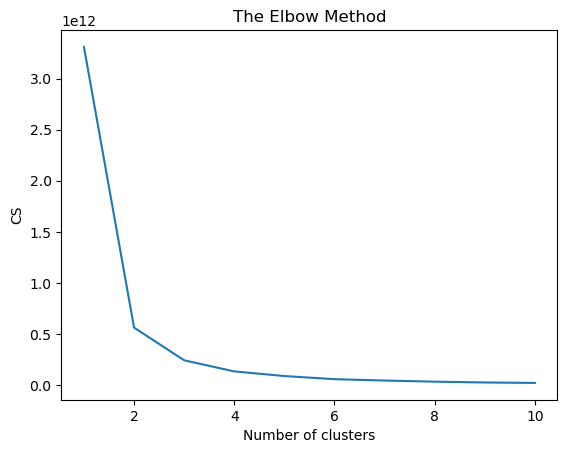

In [26]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(dfc)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 6,random_state=0, n_init="auto")
kmeans.fit(dfc)
labels = kmeans.labels_
correct_labels = sum(y == labels)

print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 303 out of 3934 samples were correctly labeled.
Accuracy score: 0.08


In [28]:
column_names = list(dfc.columns)
print(column_names)

['gmedian', 'rmedian', 'bmedian', 'gmean', 'rmean', 'bmean', 'gstd', 'rstd', 'bstd', 'gq25', 'gq75', 'rq25', 'rq75', 'bq25', 'bq75', 'cdmean', 'cdstd', 'area', 'aspect_ratio_wh_s', 'extent_s', 'solidity', 'aspect_ratio_wh', 'extent', 'orien_rre', 'orien_ell', 'ed', 'ratio_ell', 'perimeter', 'topm', 'bottomm']


### Hierachical clustering

In [29]:
#Ward, complete, average, and single linkage
hierarchical_cluster1 = AgglomerativeClustering(linkage='ward', n_clusters=6)
labels_hc = hierarchical_cluster1.fit_predict(dfc)
print(labels_hc)
hierarchical_cluster2 = AgglomerativeClustering(linkage='complete', n_clusters=6)
labels_hc2 = hierarchical_cluster2.fit_predict(dfc)
print(labels_hc2)
# Single linkage doesn't work well 
hierarchical_cluster3 = AgglomerativeClustering(linkage='single', n_clusters=6)
labels_hc3 = hierarchical_cluster3.fit_predict(dfc)
print(labels_hc3)
hierarchical_cluster4 = AgglomerativeClustering(linkage='average', n_clusters=6)
labels_hc4 = hierarchical_cluster4.fit_predict(dfc)
print(labels_hc4)

[0 3 0 ... 1 1 1]
[0 2 0 ... 2 2 2]
[0 2 0 ... 2 2 2]
[0 3 0 ... 3 3 3]


In [30]:
correct_labels1 = sum(y == labels_hc)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels1, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels1/float(y.size)))
correct_labels2 = sum(y == labels_hc2)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels2, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels2/float(y.size)))
correct_labels3 = sum(y == labels_hc3)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels3, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels3/float(y.size)))
correct_labels4 = sum(y == labels_hc4)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels4, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels4/float(y.size)))

Result: 137 out of 3934 samples were correctly labeled.
Accuracy score: 0.03
Result: 624 out of 3934 samples were correctly labeled.
Accuracy score: 0.16
Result: 661 out of 3934 samples were correctly labeled.
Accuracy score: 0.17
Result: 2032 out of 3934 samples were correctly labeled.
Accuracy score: 0.52


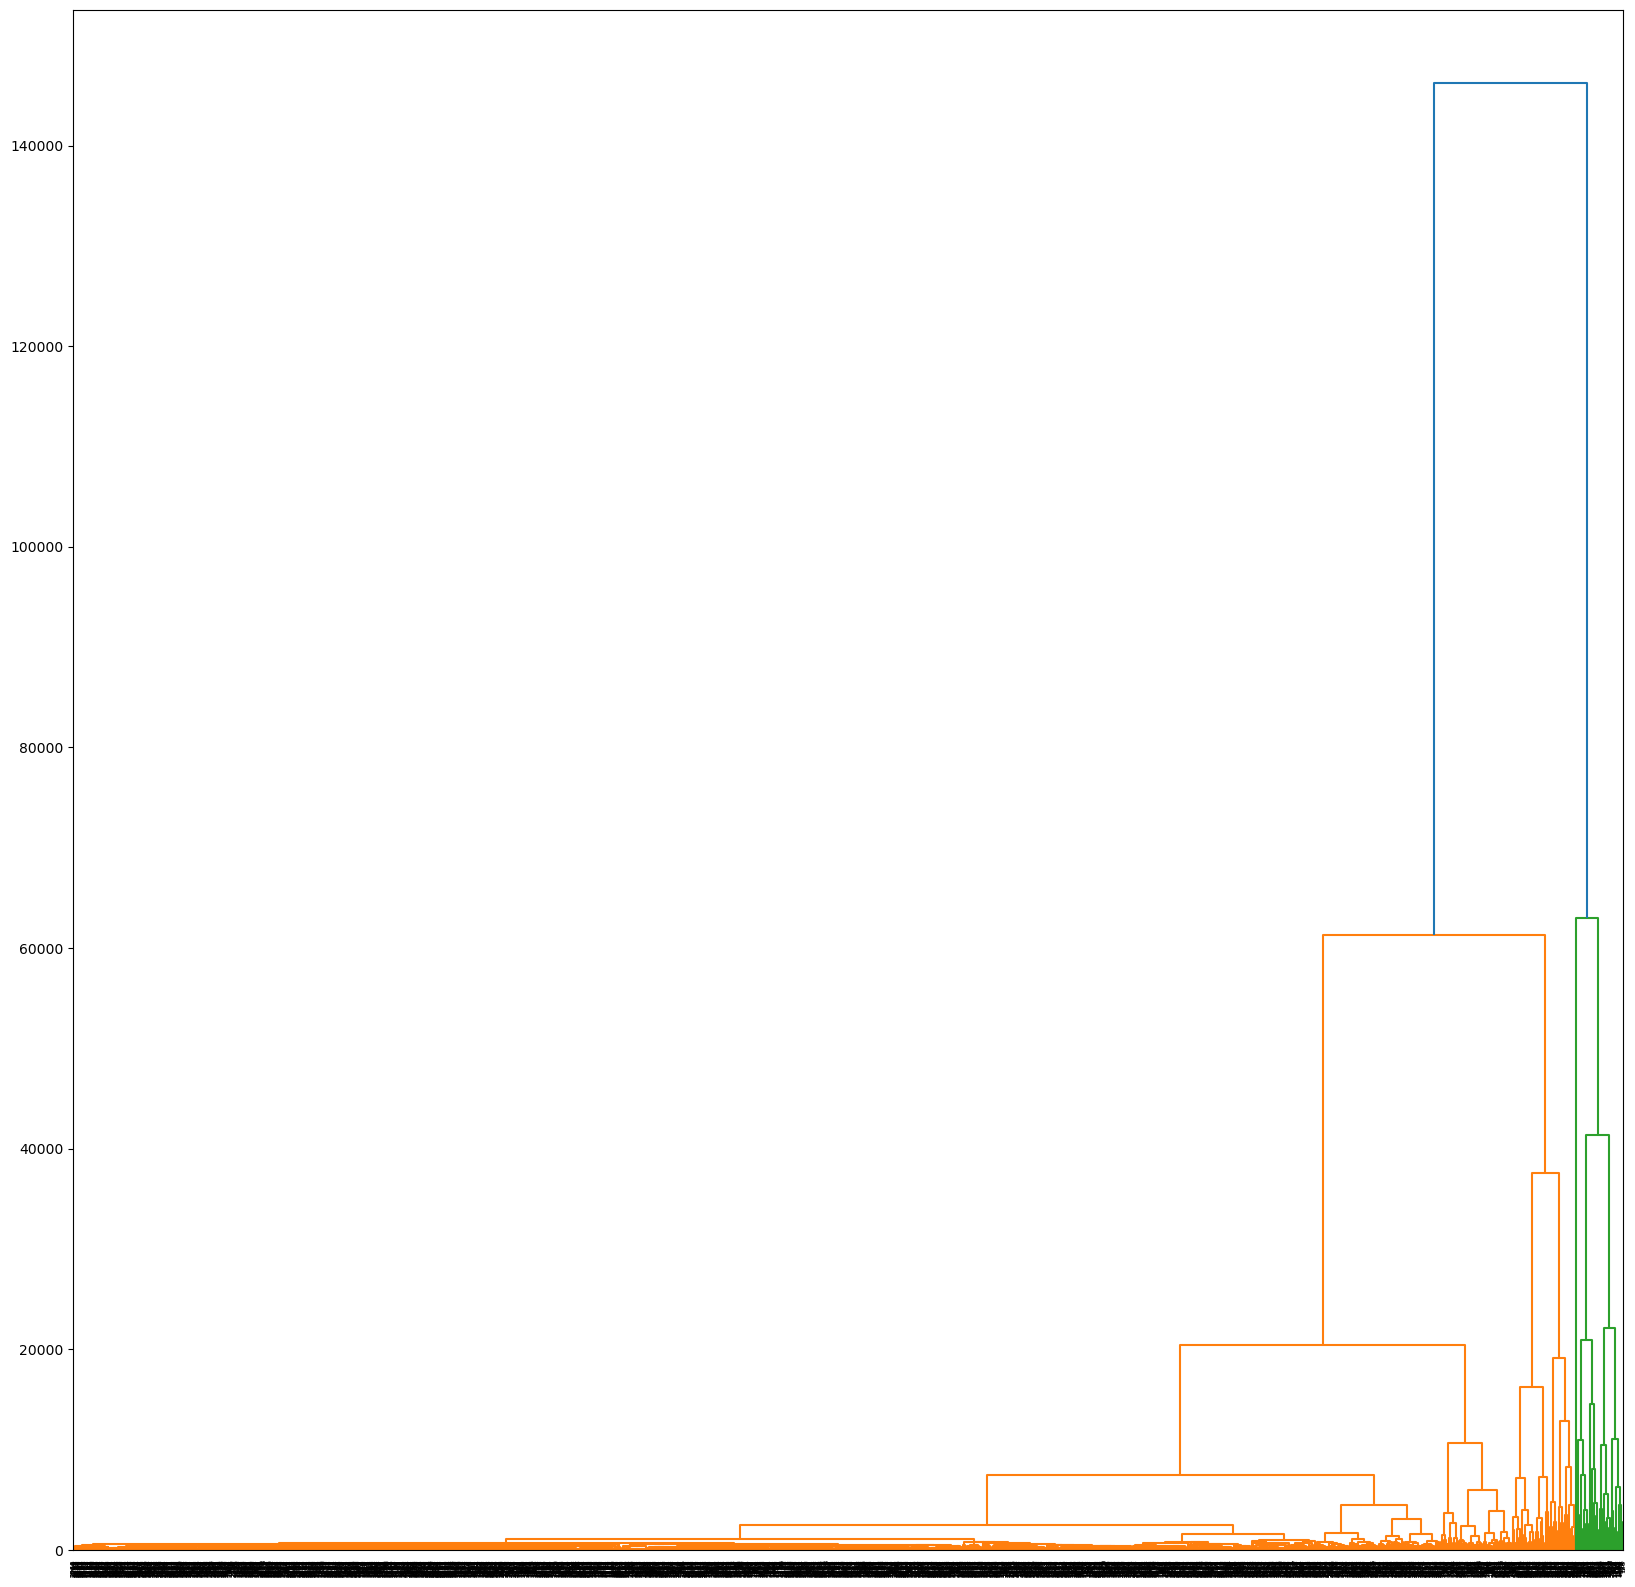

In [31]:
plt.figure(figsize=(20,20))
linkage_data = linkage(dfc, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.show()

### DBSCAN

In [32]:
cluster_db = DBSCAN(eps = 5, min_samples = 2)
labels_db = cluster_db.fit_predict(dfc)
print(labels_db)
correct_labels_db = sum(y == labels_db)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_db, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels_db/float(y.size)))

[-1 -1 -1 ... -1 -1 -1]
Result: 2 out of 3934 samples were correctly labeled.
Accuracy score: 0.00


### HDBSCAN

In [33]:
cluster_hdb = HDBSCAN(min_cluster_size = 2)
labels_hdb = cluster_hdb.fit_predict(dfc)
print(labels_hdb)
correct_labels_hdb = sum(y == labels_hdb)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels_hdb, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels_hdb/float(y.size)))


[ 47  59  47 ...  -1 704 535]
Result: 6 out of 3934 samples were correctly labeled.
Accuracy score: 0.00


## Supervised

### Decision tree

In [34]:
X = dfc
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

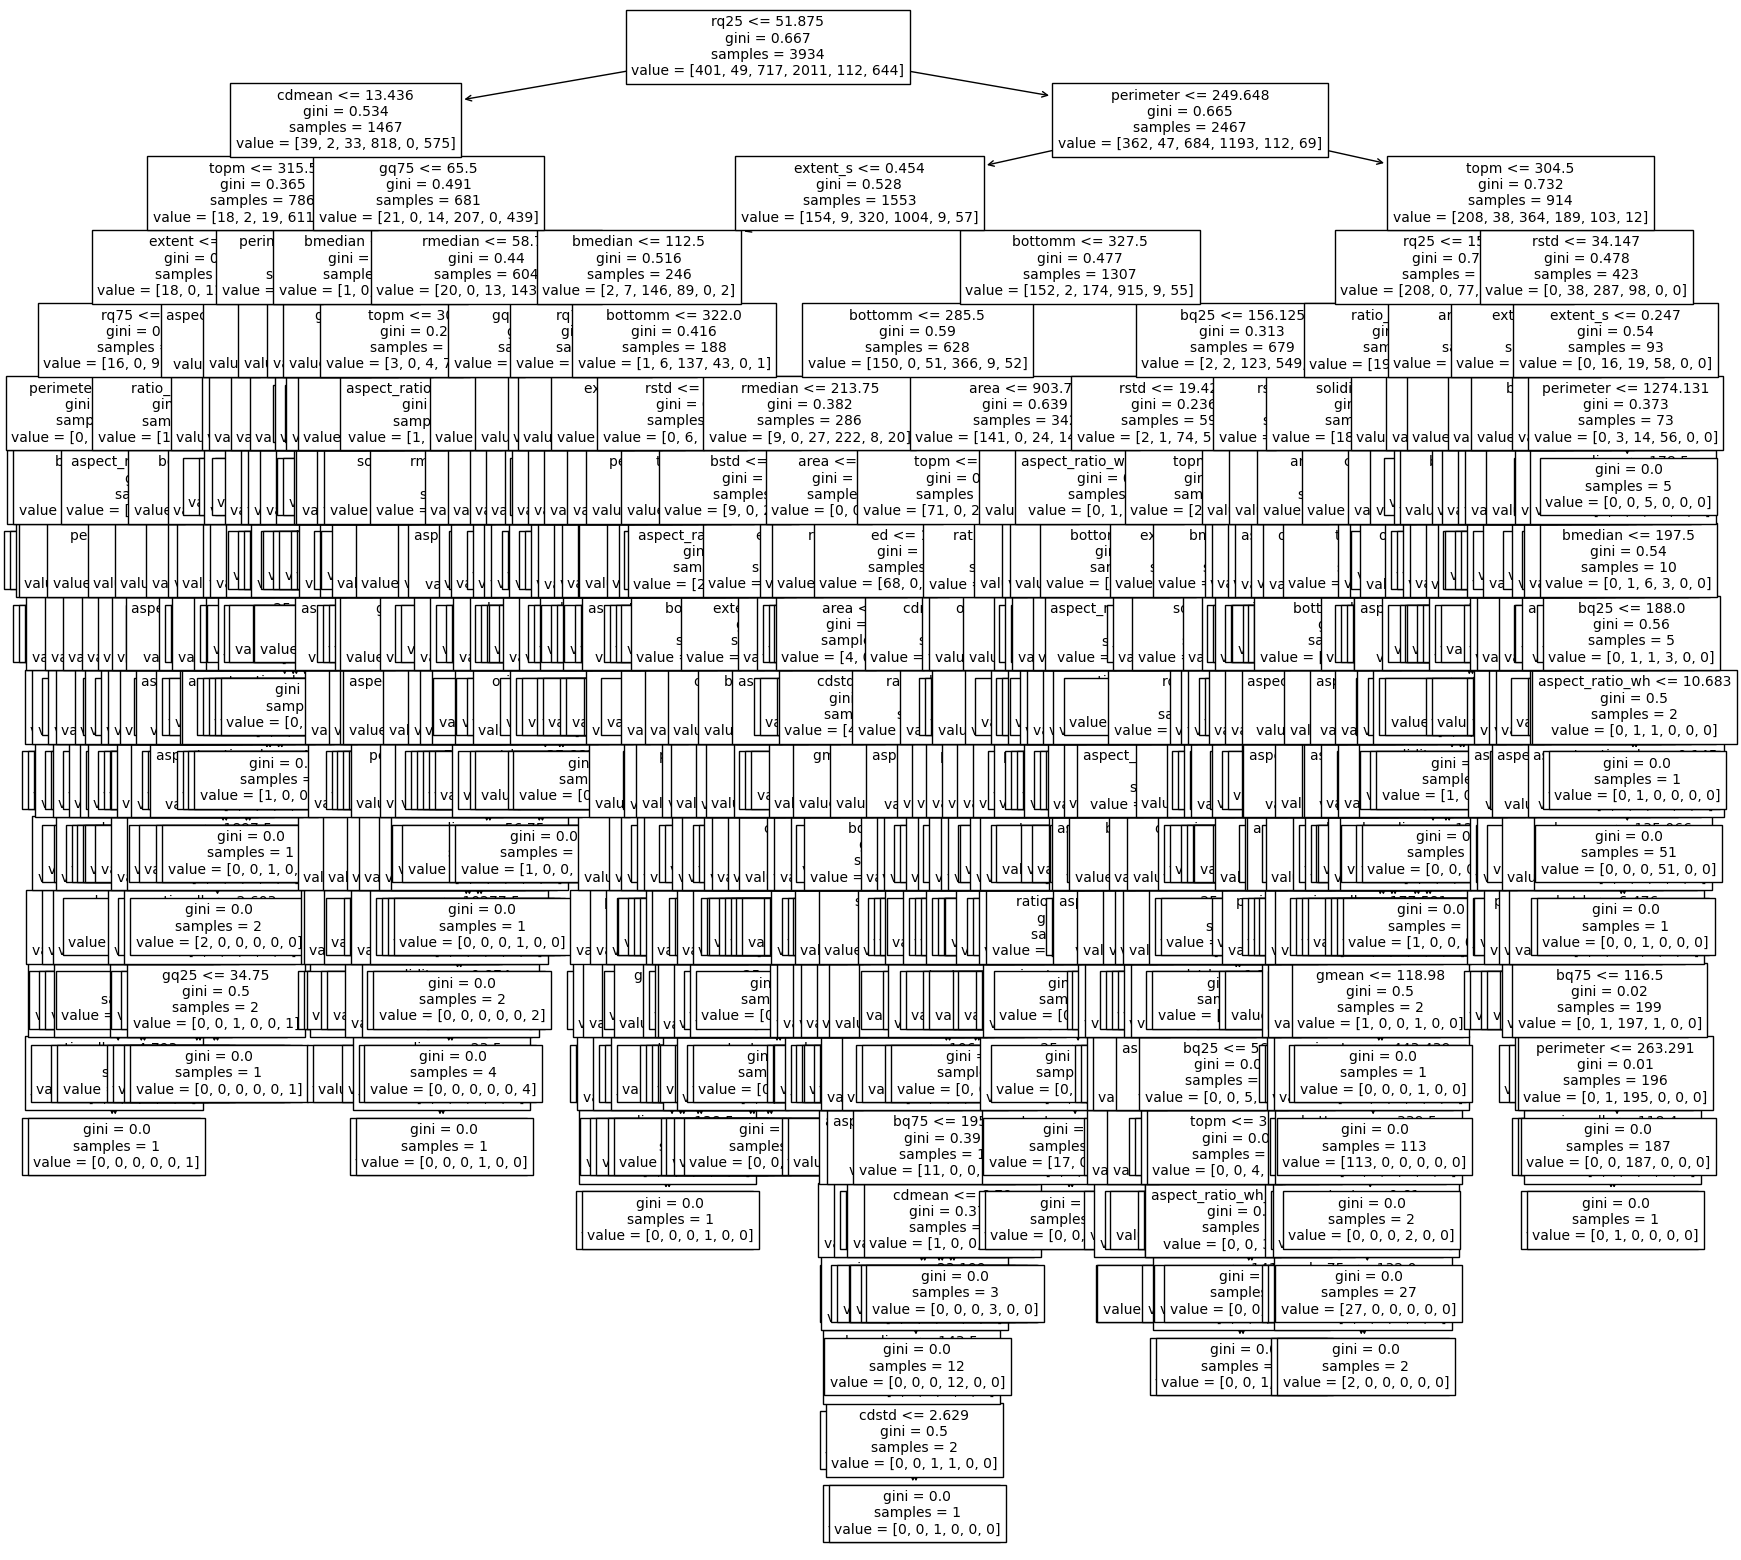

In [37]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)
plt.figure(figsize=(20,20))
tree.plot_tree(dtree, feature_names = column_names, fontsize=10)
plt.savefig('/home/yelhe/script/mt/output/' + 'decisiontree0' + '.jpg')
plt.show()

Train data accuracy: 1.0
Test data accuracy: 0.7672764227642277


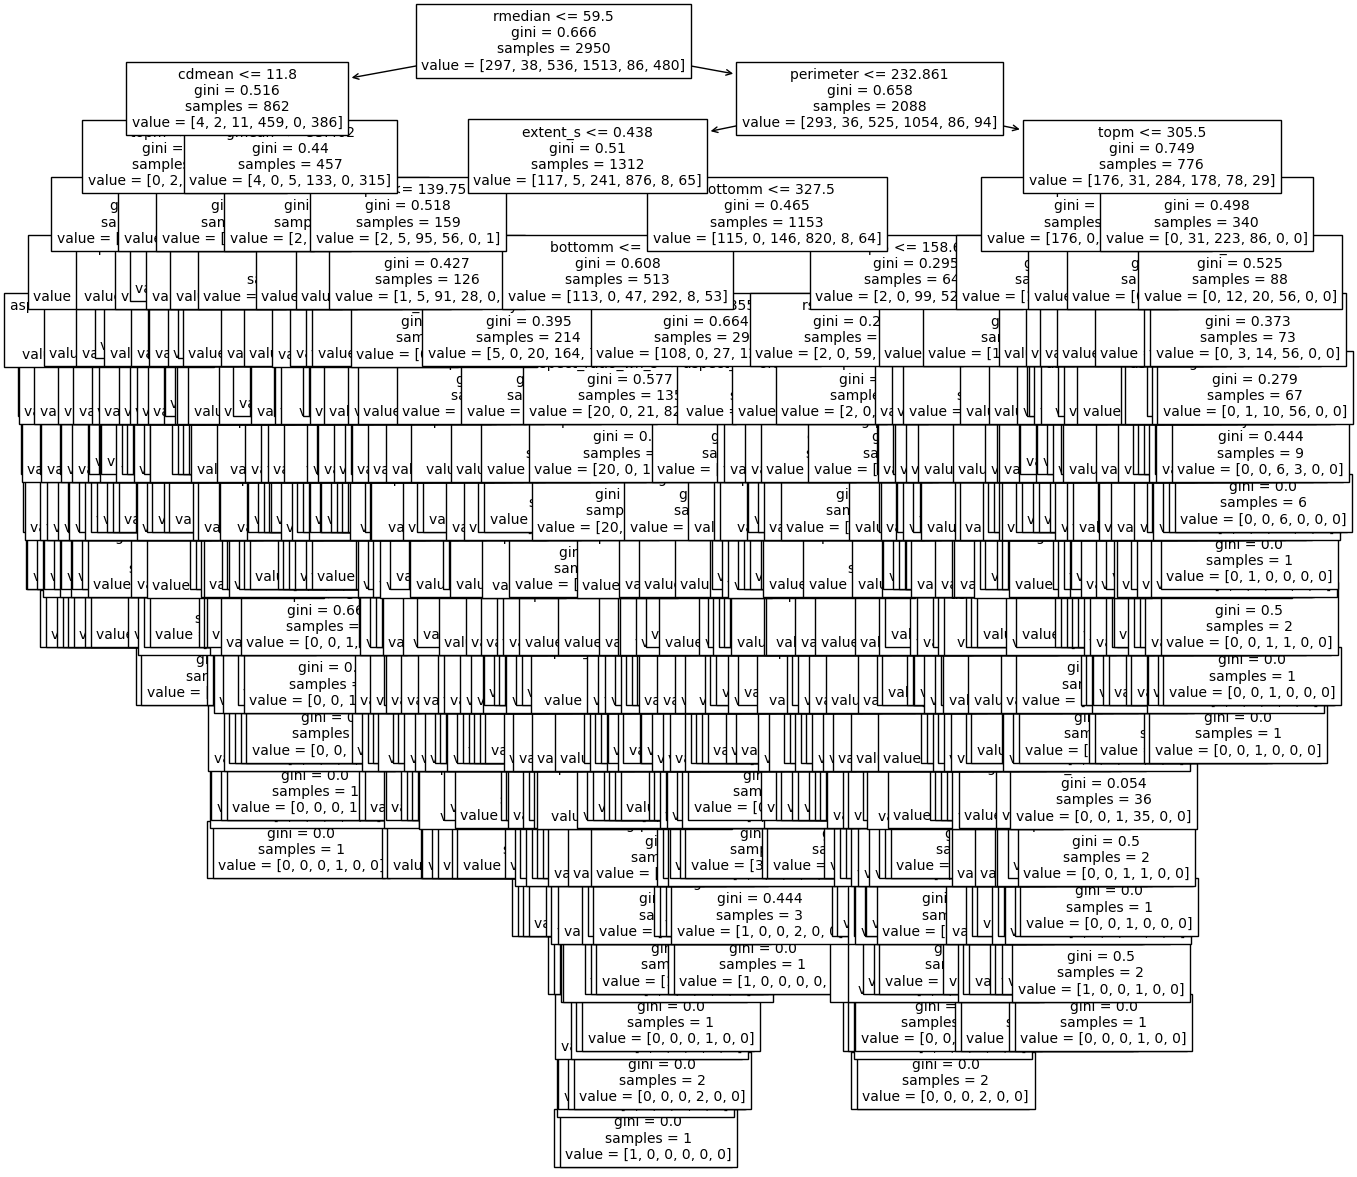

In [38]:
dtree = DecisionTreeClassifier(random_state = 2)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)
# print(y_pred)
# print(y_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))
plt.figure(figsize=(15,15))
tree.plot_tree(dtree, feature_names = column_names, fontsize=10)
plt.savefig('/home/yelhe/script/mt/output/' + 'decisiontree1' + '.jpg')
plt.show()

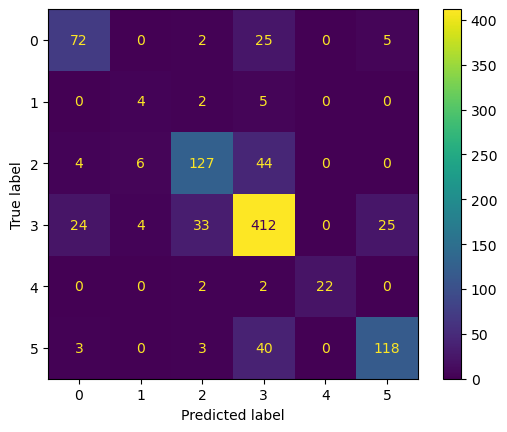

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()

In [40]:
dtree.classes_

array([0, 1, 2, 3, 4, 5])

In [42]:
print(f'class 0 accuracy: {confusion_matrix[0][0]/sum(confusion_matrix[0])}')
print(f'class 1 accuracy: {confusion_matrix[1][1]/sum(confusion_matrix[1])}')
print(f'class 2 accuracy: {confusion_matrix[2][2]/sum(confusion_matrix[2])}')
print(f'class 3 accuracy: {confusion_matrix[3][3]/sum(confusion_matrix[3])}')
print(f'class 4 accuracy: {confusion_matrix[4][4]/sum(confusion_matrix[4])}')
print(f'class 5 accuracy: {confusion_matrix[5][5]/sum(confusion_matrix[5])}')


class 0 accuracy: 0.6923076923076923
class 1 accuracy: 0.36363636363636365
class 2 accuracy: 0.7016574585635359
class 3 accuracy: 0.8273092369477911
class 4 accuracy: 0.8461538461538461
class 5 accuracy: 0.7195121951219512


### Linear Regression

In [43]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 3)

reg = linear_model.LinearRegression()
reg.fit(X_train2, y_train2)

y_pred_lr = reg.predict(X_test2)


print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test2, y_test2)))

# # plot for residual error
# # # plt.style.use('fivethirtyeight')
# # plotting residual errors in training data
# plt.scatter(reg.predict(X_train2),
# 			reg.predict(X_train2) - y_train2,
# 			color="green", s=10,
# 			label='Train data')
# # plotting residual errors in test data
# plt.scatter(reg.predict(X_test2),
# 			reg.predict(X_test2) - y_test2,
# 			color="blue", s=10,
# 			label='Test data')
# plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
# plt.legend(loc='upper right')
# plt.title("Residual errors")
# plt.show()
# plt.clf()
# plt.close()

Coefficients:  [ 1.16543889e-03 -3.71461096e-02  1.17803314e-02  9.99061772e-02
  5.50473862e-02 -8.93141340e-02 -8.75457795e-04  2.00175112e-02
 -2.14234538e-02 -4.70982637e-02 -6.81869747e-03  6.58133235e-03
 -4.24472612e-02  2.18727951e-02  2.28928616e-02  1.01666184e-02
 -5.28127868e-03  1.53120094e-05 -1.43509451e-02  8.22996034e-01
  7.28469129e-01 -1.87667894e-02 -2.21402115e+00 -8.87512284e-04
  3.70366829e-04 -9.76111465e-03 -4.55868795e-03  1.36314679e-03
  4.10840333e-03 -4.34256082e-03]
Variance score: 0.3415139439723285


In [68]:
# from sklearn.preprocessing import PolynomialFeatures
# poly_reg2=PolynomialFeatures(degree=2)
# X_poly = poly_reg2.fit_transform(X)
# lin_reg_2 = linear_model.LinearRegression()
# lin_reg_2.fit(X_poly,y)
# y_pred_lr2 = lin_reg_2.predict(X_test)

# poly_reg3 = PolynomialFeatures(degree=3)
# X_poly3=poly_reg3.fit_transform(X)
# lin_reg_3=linear_model.LinearRegression()
# lin_reg_3.fit(X_poly3,y)
# y_pred_lr3 = lin_reg_3.predict(X_test)

# # plot for residual error
# plt.style.use('fivethirtyeight')
# # plotting residual errors in training data
# plt.scatter(lin_reg_2.predict(X_train),
# 			lin_reg_2.predict(X_train) - y_train,
# 			color="green", s=10,
# 			label='Train data')
# # plotting residual errors in test data
# plt.scatter(lin_reg_2.predict(X_test),
# 			lin_reg_2.predict(X_test) - y_test,
# 			color="blue", s=10,
# 			label='Test data')
# plt.hlines(y=0, xmin=0, xmax=50, linewidth=2)
# plt.legend(loc='upper right')
# plt.title("Residual errors")
# plt.show()

### KNN

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 6)

neigh = KNeighborsClassifier(n_neighbors = 9)
neigh.fit(X_train1.values, y_train1)
y_pred_knn = neigh.predict(X_test1.values)

In [46]:
# print(y_pred_knn)
# print(y_test1)
print("Train data accuracy:",accuracy_score(y_true = y_train1, y_pred = neigh.predict(X_train1.values)))
print("Test data accuracy:",accuracy_score(y_true = y_test1, y_pred = y_pred_knn))

Train data accuracy: 0.7298305084745763
Test data accuracy: 0.6148373983739838


[[ 40   0   7  32   1  16]
 [  1   1  11   4   0   0]
 [ 15   0  79  64   5   3]
 [ 35   0  23 393   0  50]
 [  8   0  12   4   8   0]
 [ 22   0   4  61   1  84]]


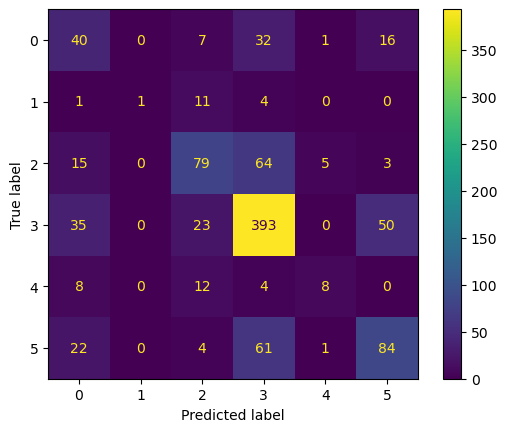

In [47]:
confusion_matrix_knn = metrics.confusion_matrix(y_test1, y_pred_knn)
print(confusion_matrix_knn)
cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_knn)
cm_display_knn.plot()

In [49]:
print(f'class 0 accuracy: {confusion_matrix_knn[0][0]/sum(confusion_matrix_knn[0])}')
print(f'class 1 accuracy: {confusion_matrix_knn[1][1]/sum(confusion_matrix_knn[1])}')
print(f'class 2 accuracy: {confusion_matrix_knn[2][2]/sum(confusion_matrix_knn[2])}')
print(f'class 3 accuracy: {confusion_matrix_knn[3][3]/sum(confusion_matrix_knn[3])}')
print(f'class 4 accuracy: {confusion_matrix_knn[4][4]/sum(confusion_matrix_knn[4])}')
print(f'class 5 accuracy: {confusion_matrix_knn[5][5]/sum(confusion_matrix_knn[5])}')

class 0 accuracy: 0.4166666666666667
class 1 accuracy: 0.058823529411764705
class 2 accuracy: 0.4759036144578313
class 3 accuracy: 0.7844311377245509
class 4 accuracy: 0.25
class 5 accuracy: 0.4883720930232558


### Random Forest

In [50]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 7)
X_train3.shape, X_test3.shape


((2950, 30), (984, 30))

In [51]:
rf = RandomForestClassifier(n_estimators = 6, random_state = 7)
rf.fit(X_train3, y_train3)
y_pred_rf = rf.predict(X_test3)

In [52]:
# print(y_pred_rf)
# print(y_test3)
print("Train data accuracy:",accuracy_score(y_true = y_train3, y_pred = rf.predict(X_train3)))
print("Test data accuracy:",accuracy_score(y_true = y_test3, y_pred = y_pred_rf))

Train data accuracy: 0.9813559322033898
Test data accuracy: 0.8008130081300813


[[ 72   0   0  21   0   4]
 [  0   4   1   1   0   0]
 [  3   0 134  23   0   0]
 [ 22   3  36 436   1  12]
 [  0   0   0   4  21   0]
 [  9   0   3  53   0 121]]


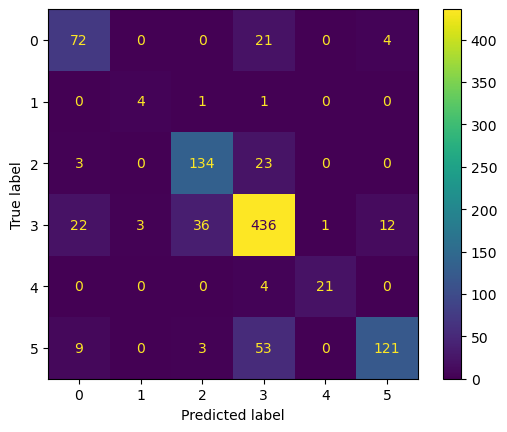

In [53]:
confusion_matrix_rf = metrics.confusion_matrix(y_test3, y_pred_rf)
print(confusion_matrix_rf)
cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf)
cm_display_rf.plot()

In [54]:
print(f'class 0 accuracy: {confusion_matrix_rf[0][0]/sum(confusion_matrix_rf[0])}')
print(f'class 1 accuracy: {confusion_matrix_rf[1][1]/sum(confusion_matrix_rf[1])}')
print(f'class 2 accuracy: {confusion_matrix_rf[2][2]/sum(confusion_matrix_rf[2])}')
print(f'class 3 accuracy: {confusion_matrix_rf[3][3]/sum(confusion_matrix_rf[3])}')
print(f'class 4 accuracy: {confusion_matrix_rf[4][4]/sum(confusion_matrix_rf[4])}')
print(f'class 5 accuracy: {confusion_matrix_knn[5][5]/sum(confusion_matrix_knn[5])}')

class 0 accuracy: 0.7422680412371134
class 1 accuracy: 0.6666666666666666
class 2 accuracy: 0.8375
class 3 accuracy: 0.8549019607843137
class 4 accuracy: 0.84
class 5 accuracy: 0.4883720930232558


Text(0, 0.5, 'feature')

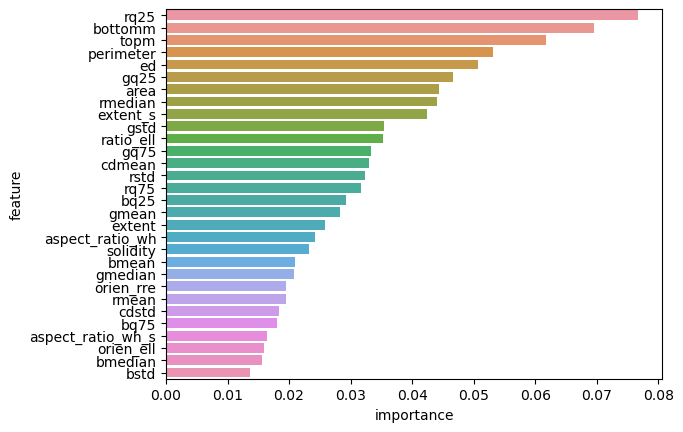

In [55]:
feature_name = list(dfc.columns.values.tolist())
importances = rf.feature_importances_
df_rf = pd.DataFrame({'features':feature_name, 'importances':importances})
df_rf.sort_values(by = ['importances'], ascending = False, inplace = True)
sn.barplot(x = df_rf['importances'], y = df_rf['features'])
plt.xlabel('importance')
plt.ylabel('feature')

### SVM

In [65]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 9)
X_train4.shape, X_test4.shape


((2753, 30), (1181, 30))

In [66]:
svmm = svm.SVC(random_state = 9, decision_function_shape = 'ovo')
svmm.fit(X_train4, y_train4)
y_pred_svm = svmm.predict(X_test4)

In [67]:
# print(y_pred_svm)
# print(y_test4)
print(svmm.classes_)
print("Train data accuracy:",accuracy_score(y_true = y_train4, y_pred = svmm.predict(X_train4)))
print("Test data accuracy:",accuracy_score(y_true = y_test4, y_pred = y_pred_svm))
print("Precision:",metrics.precision_score(y_true = y_test4, y_pred = y_pred_svm, 
                                           average = 'micro'))
print("Recall:",metrics.recall_score(y_true = y_test4, y_pred = y_pred_svm,
                                    average = 'micro'))

[0 1 2 3 4 5]
Train data accuracy: 0.5430439520523066
Test data accuracy: 0.5580016934801016
Precision: 0.5580016934801016
Recall: 0.5580016934801016


[[ 23   0  12  91   0   0]
 [  0   0   0  15   0   0]
 [  8   0  30 164   0   0]
 [  2   0   1 606   0   0]
 [  5   0  21  10   0   0]
 [  5   0   3 185   0   0]]


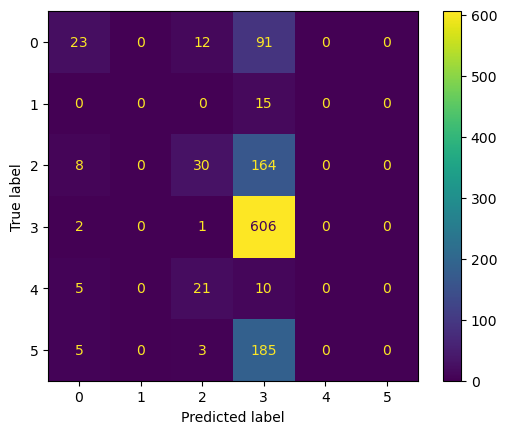

In [68]:
confusion_matrix_svm = metrics.confusion_matrix(y_test4, y_pred_svm)
print(confusion_matrix_svm)
cm_display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm)
cm_display_svm.plot()

In [69]:
print(f'class 0 accuracy: {confusion_matrix_svm[0][0]/sum(confusion_matrix_svm[0])}')
print(f'class 1 accuracy: {confusion_matrix_svm[1][1]/sum(confusion_matrix_svm[1])}')
print(f'class 2 accuracy: {confusion_matrix_svm[2][2]/sum(confusion_matrix_svm[2])}')
print(f'class 3 accuracy: {confusion_matrix_svm[3][3]/sum(confusion_matrix_svm[3])}')
print(f'class 4 accuracy: {confusion_matrix_svm[4][4]/sum(confusion_matrix_svm[4])}')
print(f'class 5 accuracy: {confusion_matrix_knn[5][5]/sum(confusion_matrix_knn[5])}')

class 0 accuracy: 0.18253968253968253
class 1 accuracy: 0.0
class 2 accuracy: 0.1485148514851485
class 3 accuracy: 0.9950738916256158
class 4 accuracy: 0.0
class 5 accuracy: 0.4883720930232558


### Correlation Matrix

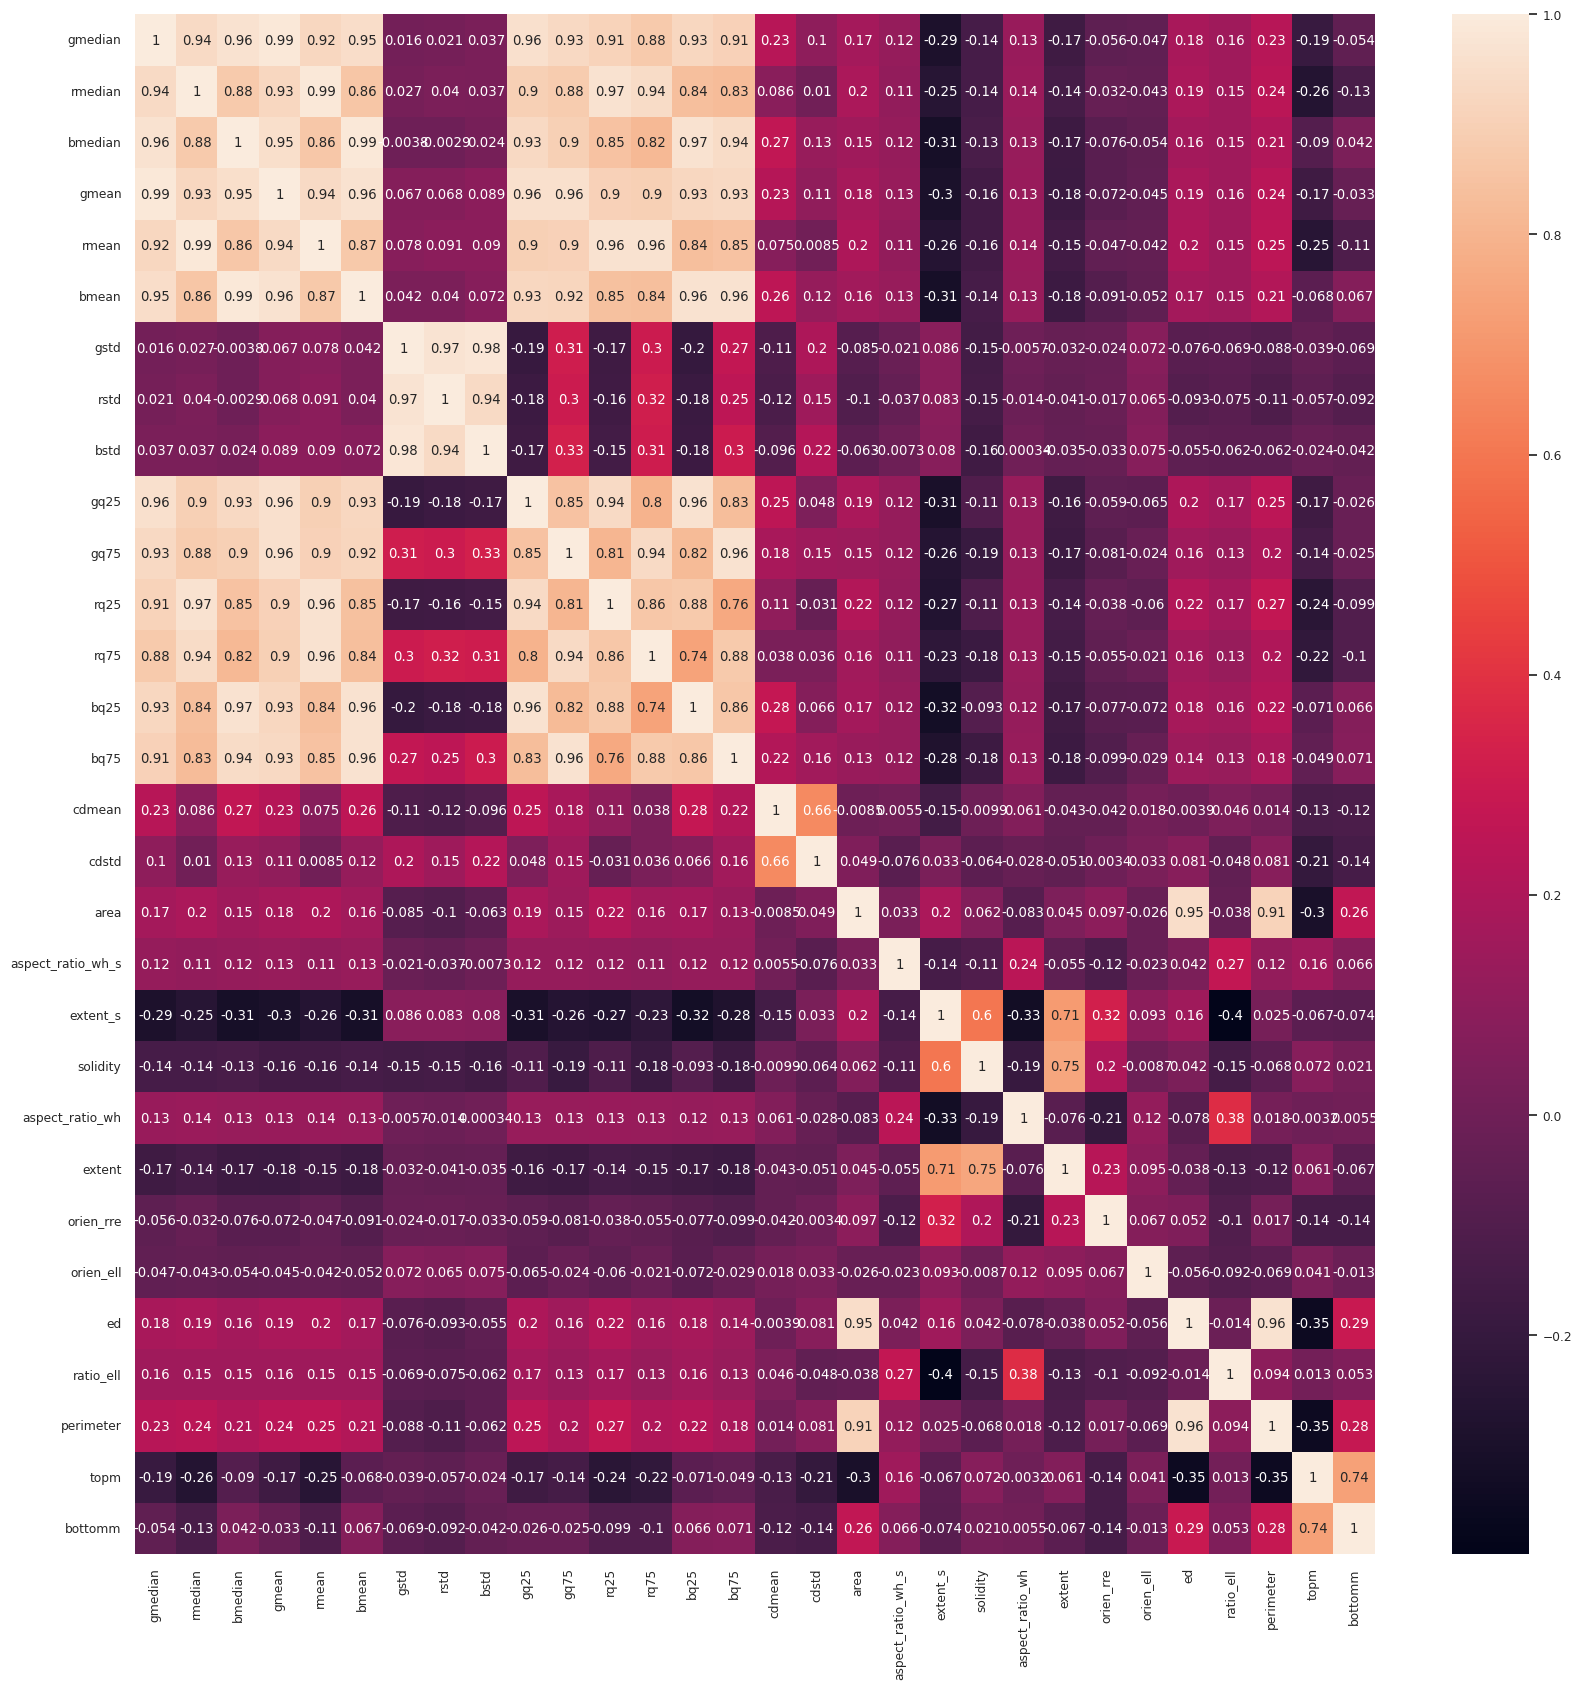

In [70]:
corr_matrix = dfc.corr()
plt.figure(figsize=(20,20))
sn.set(font_scale = 0.8)
sn.heatmap(corr_matrix, annot = True, )
# plt.savefig('fig06_corrmat.png')
plt.show()